In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
.cm-s-ipython span.cm-comment{font-size:12pt; font-style:normal; color:orange;}
.ansi-yellow-bg{color:black;font-size:15pt;}

</style>
<style>
span.toc-item-num{display:none;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1을 사용하기

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()#  v2 비활성화하고 v1을 활성화

# Tensorflow
- 그래프를 정의(tensor객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [3]:
# tensor = data(상수,변수)와 연산
node1= tf.constant('Hello,Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1)).Decoding()

b'Hello,Tensorflow'
b'Hello,Tensorflow'


AttributeError: 'NoneType' object has no attribute 'Decoding'

In [ ]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10,dtype = tf.float16)
node2 = tf.constant(20,dtype = tf.float16)
node3 = tf.add(node1,node2)
sess = tf.Session()
print(sess.run([node1,node2,node3]))

In [6]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]),dtype=tf.int16)
node2 = tf.cast(node1,dtype = tf.float32)
sess = tf.Session()
sess.run([node1,node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [ ]:
# 평균값 계산: tf.reduce_mean()
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

In [ ]:
# tf.random_normal([size]) : 평균 0이고, 표준편차가 1인 난수 size 개 발생, 난수갯수: 독립변수갯수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균 0 표준편차가 1인 난수 2(정규분포난수)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2.tensorflow v1 을 이용한 linear regression 을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [ ]:
# tensor 그래프(객체 흐름) 정의
# data set(x,y)
x = np.array([1,2,3])
y = np.array([1,2,3])

# w = weight와 bias(처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable([tf.random.normal([1])],name='weight')
b = tf.Variable(tf.random.normal([1]),name='bias')

# Hypothesis
H = W*x +b

# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 w랑 b를 구하는것
cost 함수는 2차함수이므로 곡선 그래프. 곡순위 미분값이 줄어드는 방향으로 학습(경사하강법)


'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# tf.Variable 변수 노드 (W,b)초기화
sess.run(tf.global_variables_initializer())
# 6000번 함수 (v2 에서의 fit 함수)
for step in range(0,6001):
    _, cost_val,W_val,b_val = sess.run([train,cost,W,b])
    if step%300==0:
        print("{}번째 cost:{},W:{},b:{}".format(step,cost_val,W_val,b_val))
    


In [ ]:
#최종적으로 나온 회귀식 H= W*x + b
sess.run([W,b])


In [ ]:
W_,b_ = sess.run([W,b])
W_,b_


In [ ]:
print('최종회귀식 : H = {}*x+{}'.format(W_[0],b_[0]))

In [ ]:
def to_predict(x):
    return W_[0]*x+b_[0]

In [ ]:
to_predict(3)

## 2.2 predict을 하기위한 placeholder 이용
- place


In [ ]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a,b)
sess = tf.Session()
sess.run([a,b,ab], feed_dict ={a:10,b:20})

In [ ]:
sess.run(ab, feed_dict = {a:np.array([1,2,3]), b:np.array([1,2,3])})


In [ ]:
# data set
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])

# placeholder 설정(x,y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]),name='weight')
b = tf.Variable(tf.random.normal([1]),name = 'bias')
# Hypothesis
H = W*x + b
# cost function == Loss function
cost = tf.reduce_mean(tf.square(H-y))
#  경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# session 생성 & 변수초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습 6000번
for step in range(6000):
    _, cost_val,W_val,b_val = sess.run([train,cost,W,b],feed_dict={x:x_data,y:y_data})
    if step % 200 == 0:
        print("{}/6000번째 cost:{},W:{},b:{}".format(step+1,cost_val,W_val,b_val))
         

In [ ]:
# 최종 W,b
sess.run([W,b])

In [ ]:
#예측하기
sess.run(H, feed_dict={x:5})

In [ ]:
sess.run(H,feed_dict={x:np.array([5,6,7])})

## 2.3 scale 이 다른 데이터들 linear regression 구현

In [ ]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]),name = 'weight')
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
H = W*x +b
# cost function (loss function ; 손실함수)
cost=tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.01)
train= optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range (1,6001):
        _, cost_val,W_val,b_val = sess.run([train, cost,W,b],
                                          feed_dict={x:x_data,y:y_data})
        
        if step%300==1:
            print("{}/6000번째 cost:{},W:{},b:{}".format(step,cost_val,W_val,b_val))

In [ ]:
# 예측 
sess.run(H, feed_dict={x:5})

In [ ]:
# cost값이 멈춤 :local 최소값


## 2.4 scale이 다른 데이터들의 linear regression을 구현(조정 o)
### scale을 맞추기
- normalization(정규화) : 데이터의 최대값을 1 , 최소값을 0으로 변환
                      x-Xmin
    normalization = ─────────── 
                    Xmax - Xmin
        * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScaler이용
- standardization(표준화) : 데이터의 평균을 0,표준편차를 1로 조정
                        x-Xmean(평균)
     standardization = ─────────────────
                        Xstd(표준편차)
                       * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler이용)

In [8]:
# 라이브러리를 쓰지않고 정규화 : 예측할 경우 x데이터의 스케일을 하고, 스케일된 예측값을 변환이 번거로움
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])


scaled_x_data = (x_data - x_data.min())/ (x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max()-y_data.min())
print(scaled_x_data)
print(scaled_y_data)


[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


In [11]:
x = (5- x_data.min())/(x_data.max()-x_data.min())
x

0.4444444444444444

In [16]:
# 라이브러리를 쓰지않고 정규화 
x_data = np.array([1,2,5,8,10])
print('위의 x데이터:',x_data)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 표준화 시킬객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaled_y = MinMaxScaler() # y_data를 표준화 시킬 객체
scaled_y.fit(y_data)
scaled_y_data= scaled_y.transform(y_data)
np.column_stack([x_data,scaled_x_data,y_data,scaled_y_data])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]),name = 'weight')
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
H = W*x +b
# cost function (loss function ; 손실함수)
cost=tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.001)
train= optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range (1,6001):
        _, cost_val,W_val,b_val = sess.run([train, cost,W,b],
                                          feed_dict={x:scaled_x_data,y:scaled_y_data})
        
        if step%300==1:
            print("{}/6000번째 cost:{},W:{},b:{}".format(step,cost_val,W_val,b_val))

위의 x데이터: [ 1  2  5  8 10]
1/6000번째 cost:0.24475941061973572,W:[0.6790333],b:[-0.25543872]
301/6000번째 cost:0.06408937275409698,W:[0.79443115],b:[-0.05908378]
601/6000번째 cost:0.023451710119843483,W:[0.8532046],b:[0.03155867]
901/6000번째 cost:0.014162952080368996,W:[0.88491565],b:[0.07235717]
1201/6000번째 cost:0.011911621317267418,W:[0.90356374],b:[0.08972309]
1501/6000번째 cost:0.011256897822022438,W:[0.91578823],b:[0.09613727]
1801/6000번째 cost:0.010979014448821545,W:[0.92474407],b:[0.09749367]
2101/6000번째 cost:0.010802561417222023,W:[0.9319399],b:[0.09657132]
2401/6000번째 cost:0.010663690976798534,W:[0.93810403],b:[0.094677]
2701/6000번째 cost:0.010546206496655941,W:[0.9435933],b:[0.09242138]
3001/6000번째 cost:0.01044477429240942,W:[0.94859],b:[0.09008661]
3301/6000번째 cost:0.010356731712818146,W:[0.9531918],b:[0.08780011]
3601/6000번째 cost:0.010280219838023186,W:[0.95745534],b:[0.0856162]
3901/6000번째 cost:0.010213697329163551,W:[0.9614181],b:[0.08355529]
4201/6000번째 cost:0.010155854746699333,W:[

In [20]:
# 예측
scaled_input=scaler_x.transform(np.array([[2]]))
print("2를 스케일 조정된 값:", scaled_input)
scaled_output =sess.run(H,feed_dict={x:scaled_input})
print('예측값:',scaled_y.inverse_transform(scaled_output))


2를 스케일 조정된 값: [[0.11111111]]
예측값: [[21.343945]]


In [28]:
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaled_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data,y_hat])

array([[ 5.        , 11.51856041],
       [15.        , 21.34394455],
       [68.        , 50.82010269],
       [80.        , 80.29626465],
       [95.        , 99.94702911]])

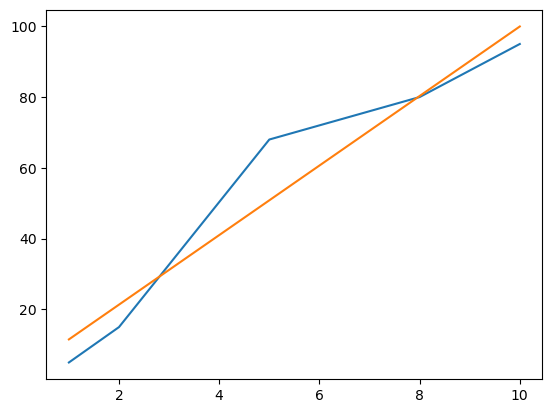

In [29]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data)
plt.plot(x_data,y_hat)

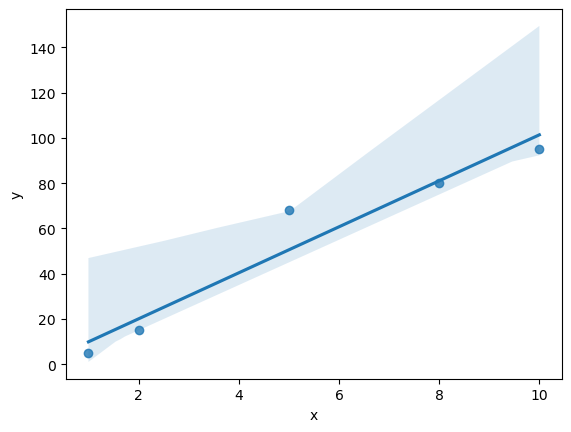

In [30]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:,0],'y':y_data[:,0]})
sns.regplot(data = df,x='x',y='y')
plt.show()

In [35]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
scaled_x_data = (x_data - x_data.mean()) / x_data.std()
scaled_y_data = (y_data - y_data.mean()) / y_data.std()
np.column_stack([scaled_x_data, scaled_y_data])

array([[-1.22474487, -1.32373476],
       [-0.93313895, -1.04563922],
       [-0.05832118,  0.42826713],
       [ 0.81649658,  0.76198177],
       [ 1.39970842,  1.17912508]])

In [48]:
# 라이브러리를 써서 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler_x= StandardScaler()
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

scaler_y= StandardScaler()
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)

np.column_stack([x_data,scaled_x_data])
np.column_stack([y_data,scaled_y_data])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]),name = 'weight')
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
H = W*x +b
# cost function (loss function ; 손실함수)
cost=tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.001)
train= optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range (1,10000):
        _, cost_val,W_val,b_val = sess.run([train, cost,W,b],
                                          feed_dict={x:scaled_x_data,y:scaled_y_data})
        
        if step%1000==1:
            print("{}/10000번째 cost:{},W:{},b:{}".format(step,cost_val,W_val,b_val))


1/10000번째 cost:1.3072694540023804,W:[0.37781426],b:[-0.94692427]
1001/10000번째 cost:0.08393538743257523,W:[0.88907814],b:[-0.1278957]
2001/10000번째 cost:0.0616188645362854,W:[0.9581317],b:[-0.01727416]
3001/10000번째 cost:0.06121174618601799,W:[0.96745825],b:[-0.00233312]
4001/10000번째 cost:0.061204325407743454,W:[0.968718],b:[-0.00031512]
5001/10000번째 cost:0.06120418384671211,W:[0.9688861],b:[-4.2561314e-05]
6001/10000번째 cost:0.06120418384671211,W:[0.9688999],b:[-5.7414045e-06]
7001/10000번째 cost:0.06120418384671211,W:[0.9688999],b:[-7.68358e-07]
8001/10000번째 cost:0.061204176396131516,W:[0.9688999],b:[-9.6479155e-08]
9001/10000번째 cost:0.06120418384671211,W:[0.9688999],b:[-2.6548458e-08]


# 2.5 독립변수 x가 여러개인 linear regression

In [11]:
import pandas as pd
import numpy as np

csv를 array로 읽어오기

In [9]:
#  방법 1: csv -> 데이터프레임 -> 넘파이 배열
# 1.csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치대체 or 삭제
#data.fillna(value=data.mean(),inplace=True)
data.dropna(how='any',axis=0,inplace=True)
X = data[['Ozone','Solar.R','Wind','Temp']].values
y= data['Ozone'].values
X.shape,y.shape

((111, 4), (111,))

In [12]:
# 방법 2: csv -> 넘파이 배열
#data = np.loadtxt('data/ozone_nonan.csv',delimiter=',') NAN과 header 없어야함
data = np.genfromtxt('data/ozone.csv',delimiter=',',skip_header=1, missing_values='NA', filling_values= np.nan)
data

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6